# 1. Random Forest - (Bagging)
Multiple different decision trees are created in parallel
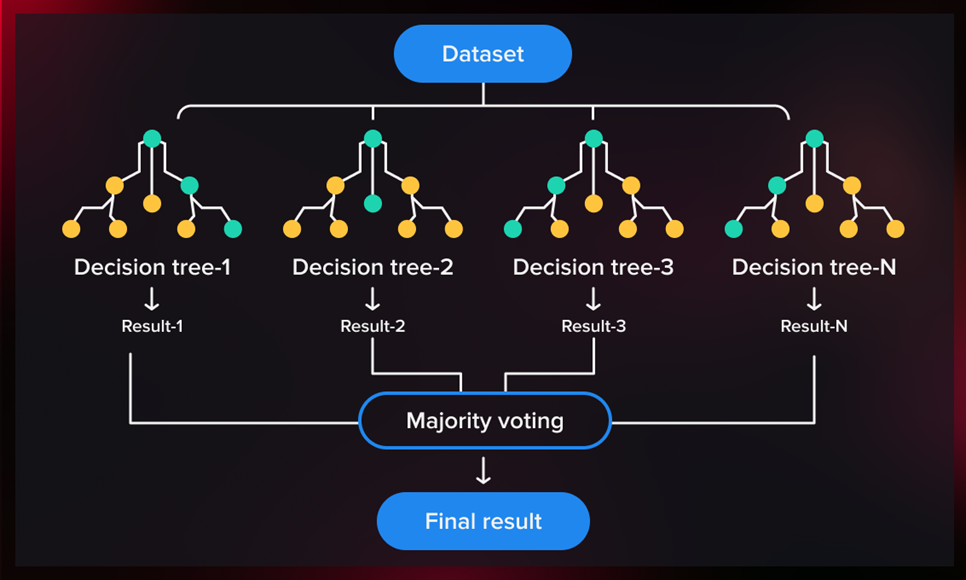

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the train dataset

In [2]:
import pandas as pd 
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
m = df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.duplicated().sum()

0

### Step 3: Seperate X and Y(Survived)

In [6]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Step 3: Perform Preprocessing on X

In [10]:
# Cat con seperation
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [11]:
cat

['Sex', 'Embarked']

In [12]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])


In [15]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [16]:
pre = ColumnTransformer([('num',num_pipe, con),
                         ('cat',cat_pipe, cat)]).set_output(transform='pandas')

In [17]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


### Step 4: Apply train test split

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [19]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
793,-1.566107,-0.104637,-0.474545,-0.473674,-0.030371,0.0,1.0,1.0,0.0,0.0
23,-1.566107,-0.104637,-0.474545,-0.473674,0.066360,0.0,1.0,0.0,0.0,1.0
97,-1.566107,-0.488887,-0.474545,0.767630,0.627278,0.0,1.0,1.0,0.0,0.0
9,-0.369365,-1.180535,0.432793,-0.473674,-0.042956,1.0,0.0,1.0,0.0,0.0
157,0.827377,0.049062,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [20]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [21]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
617,0.827377,-0.258337,0.432793,-0.473674,-0.324253,1.0,0.0,0.0,0.0,1.0
379,0.827377,-0.796286,-0.474545,-0.473674,-0.491874,0.0,1.0,0.0,0.0,1.0
725,0.827377,-0.719436,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
826,0.827377,-0.104637,-0.474545,-0.473674,0.489104,0.0,1.0,0.0,0.0,1.0
450,-0.369365,0.510161,0.432793,2.008933,-0.089684,0.0,1.0,0.0,0.0,1.0


In [22]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


In [23]:
xtrain.shape

(712, 10)

In [24]:
xtest.shape

(179, 10)

### Step 5: Build and Tune model

In [25]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1,
                                max_depth=1,
                                min_samples_leaf=5,
                                min_samples_split=5,
                                criterion='entropy')
model1.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=1)

In [26]:
model1.score(xtrain, ytrain)

0.6643258426966292

In [27]:
model1.score(xtest, ytest)

0.664804469273743

### Tune above model with RandomizedSearchCV (faster than grid search)

In [30]:
params = {'n_estimators':[10, 50, 100, 200, 300],
          'max_depth':[1, 2, 3, 4, 5, 6, 7, 8],
          'min_samples_split':[2, 3, 4, 5, 6, 7, 8],
          'criterion':['gini', 'entropy']}

In [31]:
from sklearn.model_selection import RandomizedSearchCV 
rfc = RandomForestClassifier()
rscv1 = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1_macro')
rscv1.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [32]:
rscv1.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'max_depth': 6,
 'criterion': 'gini'}

In [33]:
rscv1.best_score_

0.80390391133875

In [34]:
best_rfc = rscv1.best_estimator_
best_rfc

RandomForestClassifier(max_depth=6, n_estimators=300)

In [35]:
best_rfc.score(xtrain, ytrain)

0.8834269662921348

In [36]:
best_rfc.score(xtest, ytest)

0.8156424581005587

### Build Gradient Boosting model
Corrective decision trees are added sequentially to reduce the error
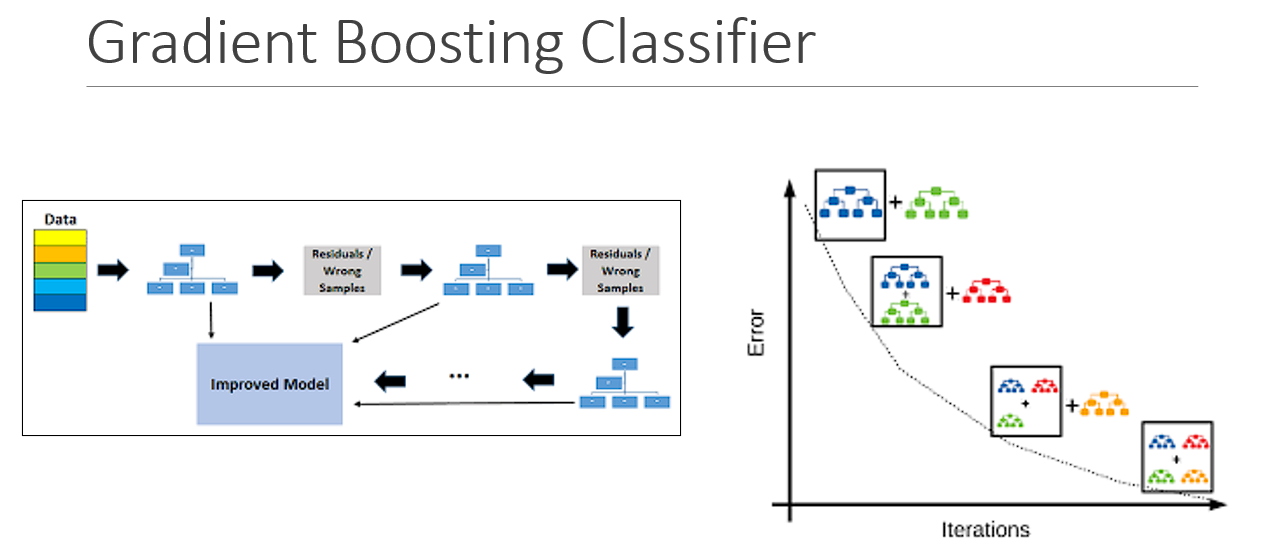

In [38]:
from sklearn.ensemble import GradientBoostingClassifier 
model2 = GradientBoostingClassifier(learning_rate=0.5,
                                    n_estimators=1,
                                    max_depth=1,
                                    min_samples_split=5,
                                    min_samples_leaf=5)
model2.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [39]:
model2.score(xtrain, ytrain)

0.7879213483146067

In [40]:
model2.score(xtest, ytest)

0.7821229050279329

### Tuning gradient boost

In [41]:
params2 = {'learning_rate':[0.01, 0.1, 0.15, 0.2],
           'n_estimators':[10, 50, 100, 200, 300],
           'max_depth':[1, 2, 3, 4, 5, 6, 7],
           'min_samples_split':[2, 3, 4, 5, 6, 7]}

In [43]:
gbc = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(gbc, param_distributions=params2, cv=5, scoring='f1_macro')
rscv2.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [44]:
rscv2.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'max_depth': 2,
 'learning_rate': 0.2}

In [45]:
rscv2.best_score_

0.8002804673864565

In [46]:
best_gbc = rscv2.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.2, max_depth=2, min_samples_split=5,
                           n_estimators=200)

In [47]:
best_gbc.score(xtrain, ytrain)

0.9199438202247191

In [48]:
best_gbc.score(xtest, ytest)

0.8212290502793296

### Here Gradient boosting (0.8212 test) is slightly better than Random forest (0.8156) 

### Select final model with higher test score i.e. Gradient boosting

In [49]:
ypred_train = best_gbc.predict(xtrain)
ypred_test = best_gbc.predict(xtest)

In [50]:
ypred_train[0:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [51]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [52]:
ypred_test[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [53]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


### Plot the confusion matrix

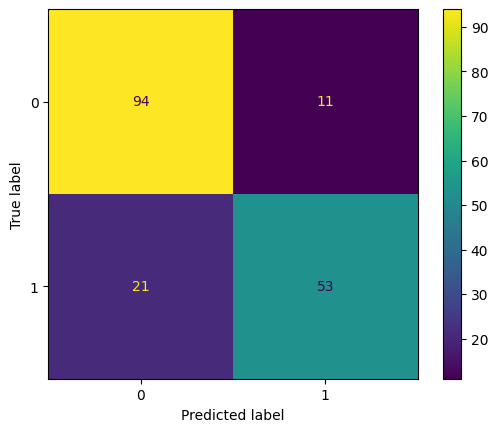

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_gbc, xtest, ytest)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### The Gradient boosting model is good because it has f1_macro of 0.81 > 0.80

### Step 6: Perfom out of sample predictions

In [56]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [58]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


In [62]:
preds = best_gbc.predict(xnew_pre)
probs = best_gbc.predict_proba(xnew_pre)

In [60]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [65]:
best_gbc.classes_

array([0, 1], dtype=int64)

In [64]:
probs[0:5]

array([[0.89452505, 0.10547495],
       [0.68306934, 0.31693066],
       [0.77069936, 0.22930064],
       [0.88217908, 0.11782092],
       [0.58236167, 0.41763833]])

In [67]:
prob_sur = probs[:, 1]
prob_sur[0:5]

array([0.10547495, 0.31693066, 0.22930064, 0.11782092, 0.41763833])

### Saving above results in dataframe

In [68]:
df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [69]:
df_final['Survived_pred'] = preds 
df_final['Probability_sur'] = prob_sur 

In [70]:
df_final

,PassengerId,Survived_pred,Probability_sur
0,892,0,0.105475
1,893,0,0.316931
2,894,0,0.229301
3,895,0,0.117821
4,896,0,0.417638
...,...,...,...
413,1305,0,0.073976
414,1306,1,0.980541
415,1307,0,0.018237
416,1308,0,0.073976


In [72]:
df_final.to_csv('GBCResults.csv', index=False)

In [73]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    278
1    140
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

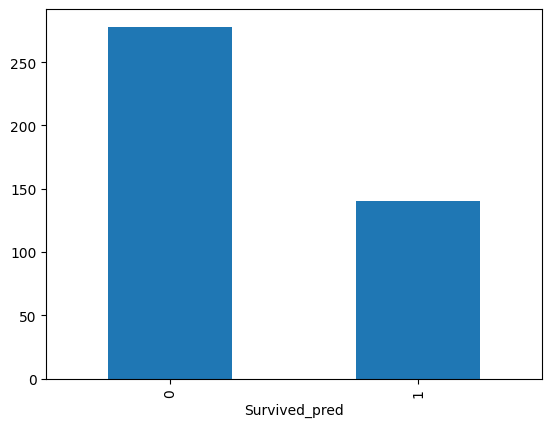

In [74]:
df_final['Survived_pred'].value_counts().plot(kind='bar')

### Feature Importances
Which features are more important

In [75]:
imp = best_gbc.feature_importances_ 

In [76]:
imp

array([0.12369743, 0.15646725, 0.03237063, 0.01985424, 0.18960404,
       0.16805171, 0.28263945, 0.00279542, 0.00770771, 0.01681212])

In [78]:
sum(imp)

1.0

In [77]:
xtrain.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [79]:
imp_ser = pd.Series(imp)
imp_ser.index = xtrain.columns
imp_ser

num__Pclass        0.123697
num__Age           0.156467
num__SibSp         0.032371
num__Parch         0.019854
num__Fare          0.189604
cat__Sex_female    0.168052
cat__Sex_male      0.282639
cat__Embarked_C    0.002795
cat__Embarked_Q    0.007708
cat__Embarked_S    0.016812
dtype: float64

In [80]:
imp_ser.sort_values(ascending=False)

cat__Sex_male      0.282639
num__Fare          0.189604
cat__Sex_female    0.168052
num__Age           0.156467
num__Pclass        0.123697
num__SibSp         0.032371
num__Parch         0.019854
cat__Embarked_S    0.016812
cat__Embarked_Q    0.007708
cat__Embarked_C    0.002795
dtype: float64

<Axes: title={'center': 'Feature Importance'}>

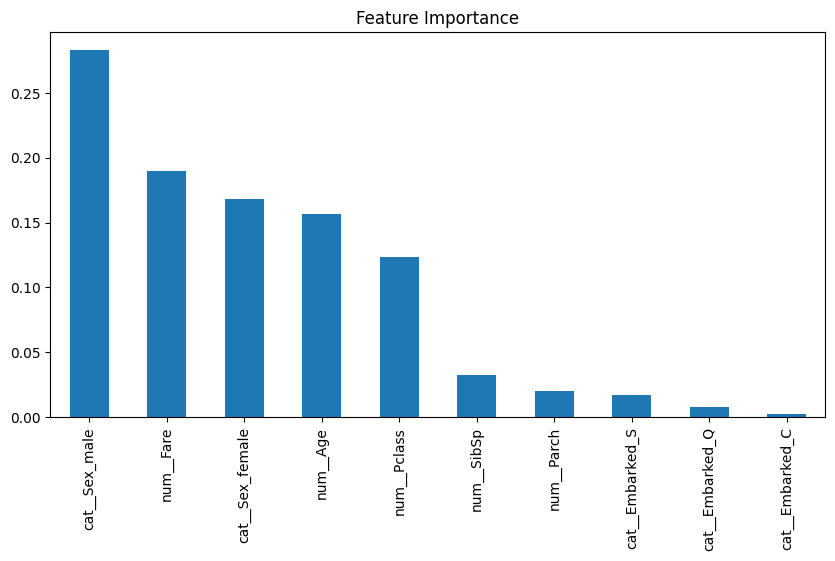

In [81]:
imp_ser.sort_values(ascending=False).plot(kind='bar', 
                                          figsize=(10, 5),
                                          title='Feature Importance')